## Object Detection for Self Driving Cars


Let's begin by importing the necessary libraries. You are already be familiar with Pandas, NumPy, and Matplotlib.pyplot.

For this object detection task, we will use three different functions from the "scikit-learn" library named "train_test_split", "MLPClassifier" and "accuracy_score"

These components are pivotal in AI workflows, aiding in data partitioning, model creation, and performance evaluation.

Additionally, we will also import the PIL library. This library provides a wide range of functionality for image processing, including opening, saving, resizing, cropping, and enhancing images, making it an essential tool for object detection task.

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from PIL import Image

These lines of code prepare a dataset for object detection task.

You'll notice the "Vehicles" dataset folder in the left column.

Feel free to open it and take a look. Inside, you'll find a variety of vehicle types subfolders, titled "Big Truck," "City Car," "Sedan," "Truck," and more. Each of these subfolders contains 100 images.

In the first line of code, "classes" variable is assigned the names of subfolders contained within the "Vehicles" folder.

Last two ines of code initialize two empty lists: "images" and "labels." These lists are typically used to store image data and their corresponding class labels, respectively, as the code proceeds. 

In the context of a object detection task, "images" would hold the actual image data, while "labels" would store the category labels associated with each image. 

This organization is crucial for training and testing machine learning models, where images and their labels are used to teach the model to recognize and categorize objects within the images.

In [2]:
classes = os.listdir("Vehicles")
print(classes)

images = []
labels = []

['Big Truck', 'City Car', 'Multi Purpose Vehicle', 'Sedan', 'Sport Utility Vehicle', 'Truck', 'Van']


Now let's open an image from a subfolder and display it.

The first line of code creates a variable called class_folder. It uses the os.path.join function to combine two strings: "Vehicles" and 'City Car' to create a file path. 

So, class_folder will contain the file path "Vehicles/City Car". 

Another variable called 'image_path' is created in the second line. It uses os.path.join again, but this time it combines the class_folder (which is "Vehicles/City Car") with 'City Car (1).jpg' to create a full file path to an image file.

The third line, opens the image file located at the image_path using the Image.open function. It loads the image into a variable called image.

Finally, the 'plt.imshow()' function is used to display the image.

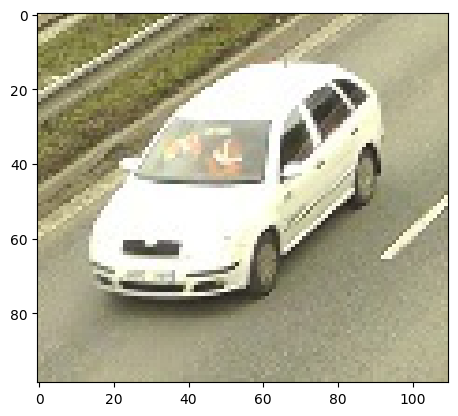

In [11]:
class_folder = os.path.join("Vehicles", 'City Car')
image_path = os.path.join(class_folder, 'City Car (1).jpg')  
image = Image.open(image_path)  
plt.imshow(image)

This code snippet, resize the image previously loaded as 'image' to a smaller 100x100 pixel size and storing it in a new variable called 'image1', and display it.

Resizing is crucial for consistency in image dimensions, enabling Neural Network models to process data uniformly and learn effectively.


When comparing the previously displayed original image and the resized image, it's evident that the image size has been reduced from its initial dimensions of 110 x 100 pixels to a smaller 100x100 pixel size.

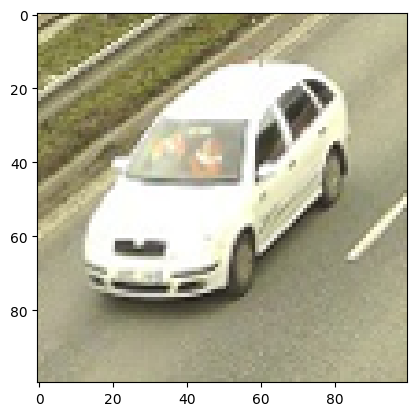

In [12]:
image1 = image.resize((100, 100))
plt.imshow(image1)

The following code transform the resized image 'image1' into a grid of numbers that represents the colors and shades of each pixel in the image, and stored in a variable named image_array.

Let's print and see the pixels.

In [13]:
image_array = np.array(image1)
print(image_array)

[[[212 200 158]
  [173 161 119]
  [176 164 125]
  ...
  [194 194 160]
  [195 195 160]
  [195 195 159]]

 [[176 164 125]
  [179 167 129]
  [178 168 132]
  ...
  [196 196 161]
  [199 199 162]
  [197 197 161]]

 [[178 168 133]
  [187 177 142]
  [155 145 110]
  ...
  [193 193 157]
  [196 196 160]
  [193 193 157]]

 ...

 [[162 161 133]
  [173 172 144]
  [163 159 132]
  ...
  [184 180 145]
  [182 178 143]
  [175 171 136]]

 [[166 165 137]
  [161 160 132]
  [158 153 126]
  ...
  [186 182 147]
  [183 179 144]
  [181 177 142]]

 [[163 162 134]
  [165 163 135]
  [164 160 133]
  ...
  [178 174 139]
  [171 167 132]
  [178 174 139]]]


Now let's resize all the images in the "Vehicle" folder, transfrom them into a pixel matrix and store them.

To iterate through the subfloders and images two 'for' loops are used in the following code.

The first "for" loop iterates through a list of class names such as "City Car, Sedan, Truck,...", each representing a different category or class. 

For each class, it constructs a folder path where images for that class are stored using the second line. 

Inside each class folder, it goes through individual image files, opens them, resizes them to a uniform size of 100x100 pixels, and converts them into numerical arrays using the NumPy library. These arrays are then added to a list called images. 

Simultaneously, the code keeps track of the class associated with each image and adds this class information to another list called labels. 

Ultimately, this code helps prepare image data by standardizing its size and associating it with corresponding class labels, making it suitable for training Neural Network models that require structured input data with class labels.

In [3]:
for class_name in classes:
    class_folder = os.path.join("Vehicles", class_name)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)  
        image = Image.open(image_path)      # Opens the image file
        image1 = image.resize((100, 100))  # Resize the image to a consistent size
        image_array = np.array(image1)     # Converts the resized image file into numerical array
        images.append(image_array)        # Generated image arrays are added to a list called images 
        labels.append(class_name)         # Generated class arrays are added to a list called labels 

In these two lines of code, the images and labels lists are converted into NumPy arrays.

The np.array(images) operation transforms the "images" list, which originally held individual image data as separate NumPy arrays, into a single, unified NumPy array. 

Similarly, np.array(labels) transforms the "labels" list, which stores class labels associated with each image, into a NumPy array. 

This structured data format is important, allowing for the seamless training and testing of neural network models for tasks like image classification or object detection.

In [4]:
images = np.array(images)
labels = np.array(labels)

This code snippet employs the train_test_split function to partition a dataset into two distinct subsets. 

The data contained in images and labels are divided into training and testing sets, represented respectively by 'X_train' and 'y_train' (used for model training) and 'X_test' and 'y_test' (used for evaluating model performance).

The 'test_size' parameter specifies that 20% of the data should be allocated to the testing set, leaving 80% for training. 

Additionally, the random_state parameter is set to 42, ensuring that the data split remains consistent across multiple runs for reproducibility. 

This separation enables the assessment of how well a neural network model generalizes to new, unseen data by training on one portion and testing on another.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print("Training data size (X_train):", len(X_train))
print("Testing data size (X_test):", len(X_test))

Training data size (X_train): 560
Testing data size (X_test): 140


In scikit-learn, it's important that your input data is structured in a way where each row corresponds to an individual example or data point, and each column corresponds to a specific feature or attribute of those examples.

Therefore, we need to convert each image from a two-dimensional structure (e.g., a 100x100 pixel image) into a one-dimensional array.

For example, if you have a 100x100 pixel image, flattening it means converting it into a 1D array with 10,000 elements, where each element represents the value of a single pixel.

The following code, flattern the training and testing images.

'X_train.reshape(X_train.shape[0], -1)' is used to reshape the X_train array. 

    The first argument, X_train.shape[0], specifies the number of rows in the new reshaped array. In this case, it's kept the same, so you have the same number of images.

    The second argument, '-1', is a placeholder that tells NumPy to automatically calculate the number of columns needed to keep the total number of elements the same. 

Similaly the test images also flatterned.

In [31]:
# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

The following code snippet initializes a multi-layer perceptron (MLP) classifier using scikit-learn's MLPClassifier. 

It configures the neural network architecture with a single hidden layer containing 64 neurons, sets a maximum of 50 training iterations (epochs).

The simple neural network is purposefully created with the specific aim of reducing the training time while still retaining some capacity for learning patterns in the data. 

To introduce additional hidden layers to the neural network, we simply extend the hidden_layer_sizes parameter by specifying the desired number of neurons in each layer. 

For instance, if we intend to incorporate three hidden layers, each containing 64 neurons, we can do so by altering the hidden_layer_sizes as follows 'hidden_layer_sizes=(64, 64, 64)'

In [33]:
model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=50)

This code is used to train the constructed neural network.

The training process involves adjusting the model's internal parameters based on the flattened training data 'X_train_flattened', and the corresponding target labels 'y_train'. 

Please be advised that this process may require a certain amount of time to complete effectively.

In [34]:
model.fit(X_train_flattened, y_train)

MLPClassifier(hidden_layer_sizes=(64,), max_iter=50)

In this code, the trained neural network model is employed to make predictions on a separate dataset known as the test data (X_test_flattened). 

The resulting predictions are stored in the variable 'y_pred', providing insights into how well the model generalizes to new, unseen data, and allowing for the evaluation of its performance on the test dataset.

In [13]:
# Predict on the test set
y_pred = model.predict(X_test_flattened)

The following code calculates and displays the accuracy of the trained neural network model. 

The accuracy_score function measures how well your model's predictions (stored in y_pred) align with the actual labels (in y_test) for your test dataset.

The resulting accuracy value represents the proportion of correctly classified test examples, providing a straightforward and easily interpretable metric for assessing the model's performance. 

A higher accuracy (close to 1) signifies better predictive capability, indicating how well the model generalizes to new data and how effective it is at classifying the test examples in your machine learning task.

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2785714285714286


It's evident that the accuracy achieved with this specific neural network is relatively low.

The lower accuracy we're seeing is because we purposely kept the neural network simple, with fewer layers, and used a smaller training dataset to make training faster.

To enhance the model's performance, consider refining the neural network by introducing additional layers and extending the number of training iterations. 

This approach could lead to a more powerful and accurate model, better suited to capture intricate patterns in the data.

This code segment creates a visual representation of the first 9 test images along with their corresponding predictions made by the neural network model.

It uses matplotlib to organize these images into a 3x3 grid of subplots within a figure, displaying each image along with its predicted and actual labels as titles. 

You can easily spot the differences between what the model predicted and what's actually correct because the model isn't doing very well right now.

But if we make the model better, these differences should become smaller, and the model's predictions will be more accurate.

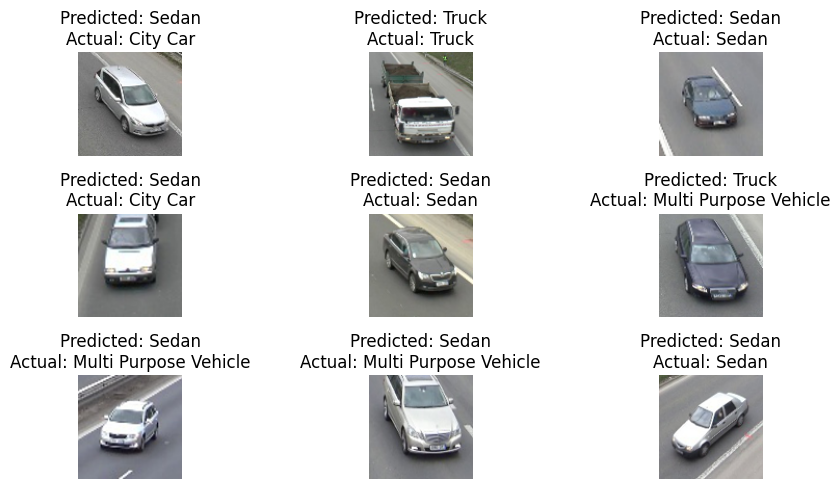

In [41]:
plt.figure(figsize=(10, 5))
for i in range(9):  # Display first 10 test images with predictions
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title("Predicted: {}\nActual: {}".format(y_pred[i], y_test[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()

Now, let's upload some images and see how well the model can predict what's in those images.

This following code segment loads an image named "Test1.jpg," resizes it to a consistent dimension of 100x100 pixels.

Then converts it into a numerical array for further processing. 

The array is then flattened into a 1D format to match the input format expected by the trained neural network model. 

For the testing pitpose you can use the saved 5 test images. If you want to test on other images please upload and test it.

For testing purposes, we can use the five pre-saved test images. If you wish to test the model on different images, please upload those images and proceed with the testing.

[[255 255 255 ... 208 197 200]]


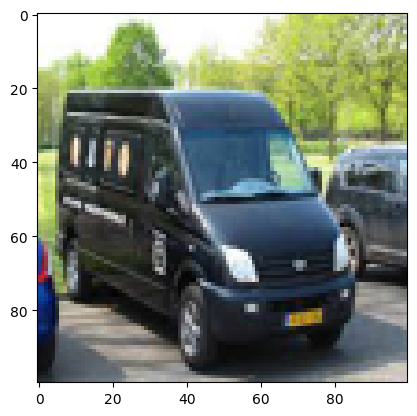

In [80]:
# Load the image and preprocess it
uploaded_image_path = "Test3.jpg"  # Replace this with the actual path to your image
uploaded_image = Image.open(uploaded_image_path)
uploaded_image = uploaded_image.resize((100, 100))
uploaded_image_array = np.array(uploaded_image)
uploaded_image_flattened = uploaded_image_array.reshape(1, -1)  # Reshape to match the model's input format
plt.imshow(uploaded_image)


This code snippet makes predictions using the previously trained neural network model on the preprocessed uploaded_image data  and stores the predicted class label in the variable predicted_class. 

It then prints the predicted class label to the console, allowing you to see what the model predicts the content of the uploaded image to be.

In [79]:
# Predict using the trained model
predicted_class = model.predict(uploaded_image_flattened)[0]
print(predicted_class)

Big Truck
